In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm

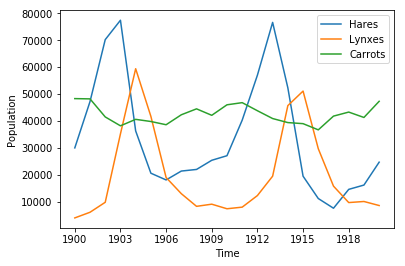

In [2]:
inf = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")
plt.plot(inf[:, 0], inf[:, 1], label = "Hares")
plt.plot(inf[:, 0], inf[:, 2], label = "Lynxes")
plt.plot(inf[:, 0], inf[:, 3], label = "Carrots")
plt.xticks(np.arange(inf[:, 0].min(), inf[:, 0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

In [3]:
plt.bar(inf[:, 0], 1, label = "Lynxes")
plt.bar(inf[:, 0], inf[:, 1] / (inf[:, 1] + inf[:, 2]), label = "Hares")
plt.legend()
plt.show()

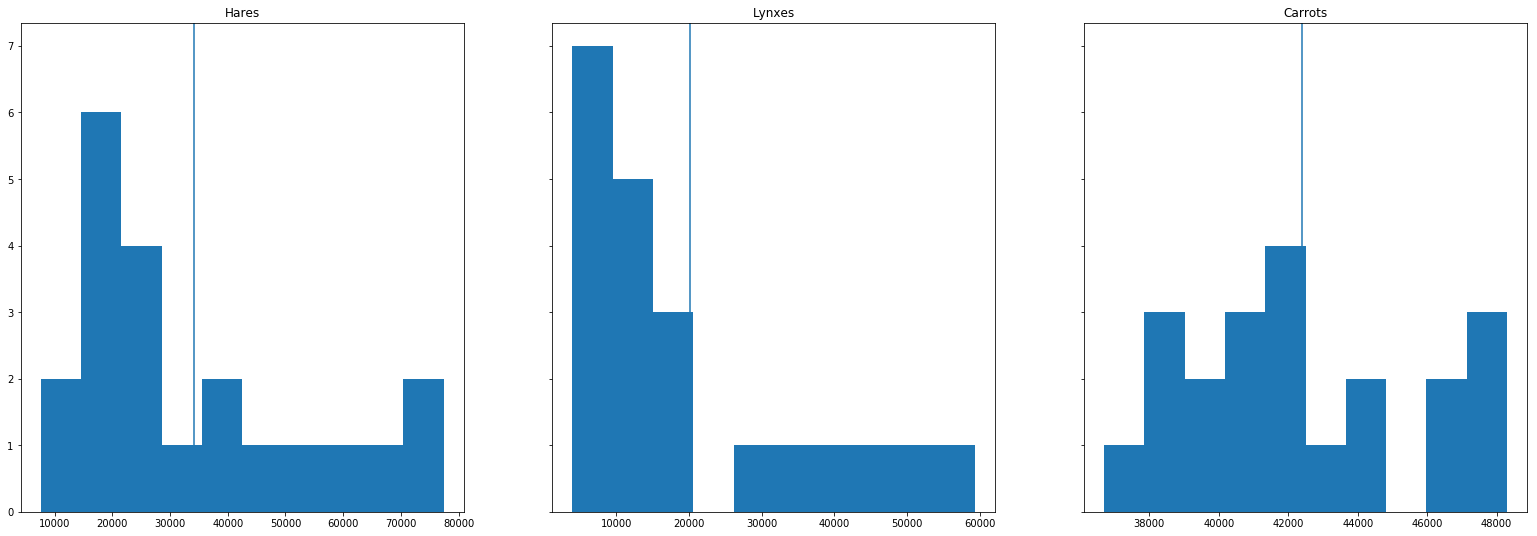

Std: 20897.906458089667 16254.591536908763 3322.5062255844787


In [4]:
fig, axs = plt.subplots(1, 3, figsize=(27, 9), sharey=True)
axs[0].hist(inf[:, 1])
axs[0].set_title('Hares')
axs[0].axvline(x = inf.mean(axis = 0)[1])
axs[1].hist(inf[:, 2])
axs[1].set_title('Lynxes')
axs[1].axvline(x = inf.mean(axis = 0)[2])
axs[2].hist(inf[:, 3])
axs[2].set_title('Carrots')
axs[2].axvline(x = inf.mean(axis = 0)[3])
plt.show()
print('Std:', inf.std(axis = 0)[1], inf.std(axis = 0)[2], inf.std(axis = 0)[3])

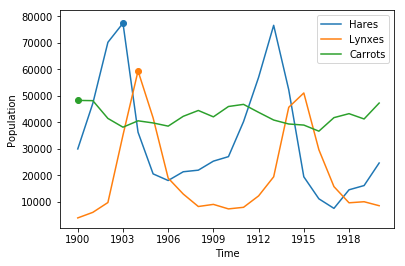

In [5]:
plt.plot(inf[:, 0], inf[:, 1], label = "Hares")
plt.plot(inf[:, 0], inf[:, 2], label = "Lynxes")
plt.plot(inf[:, 0], inf[:, 3], label = "Carrots")
plt.xticks(np.arange(inf[:, 0].min(), inf[:, 0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.scatter(inf[:, 0][inf[:, 1].argmax()], inf[:, 1].max())
plt.scatter(inf[:, 0][inf[:, 2].argmax()], inf[:, 2].max())
plt.scatter(inf[:, 0][inf[:, 3].argmax()], inf[:, 3].max())
plt.show()

In [6]:
larg = np.where(inf[:, 1] > inf[:, 2], 'H', 'L').tolist()
print(larg)

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


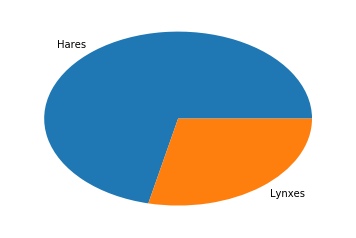

In [7]:
plt.pie([larg.count('H'), larg.count('L')], labels = ['Hares','Lynxes'])
plt.show()

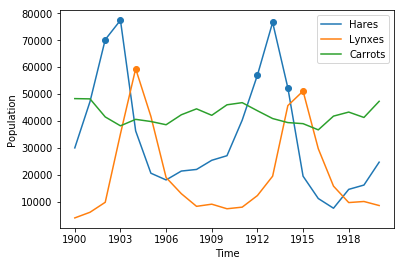

In [8]:
plt.scatter(inf[:, 0][inf[:, 1] > 50000], inf[:, 1][inf[:, 1] > 50000])
plt.scatter(inf[:, 0][inf[:, 2] > 50000], inf[:, 2][inf[:, 2] > 50000])
plt.scatter(inf[:, 0][inf[:, 3] > 50000], inf[:, 3][inf[:, 3] > 50000])
plt.plot(inf[:, 0], inf[:, 1], label = "Hares")
plt.plot(inf[:, 0], inf[:, 2], label = "Lynxes")
plt.plot(inf[:, 0], inf[:, 3], label = "Carrots")
plt.xticks(np.arange(inf[:, 0].min(), inf[:, 0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

In [9]:
print('Hares: ', np.transpose(inf[:, 0][np.argsort(inf, axis = 0)[0:2]])[1])
print('Lynxes: ', np.transpose(inf[:, 0][np.argsort(inf, axis = 0)[0:2]])[2])
print('Carrots: ', np.transpose(inf[:, 0][np.argsort(inf, axis = 0)[0:2]])[3])

Hares:  [1917. 1916.]
Lynxes:  [1900. 1901.]
Carrots:  [1916. 1903.]


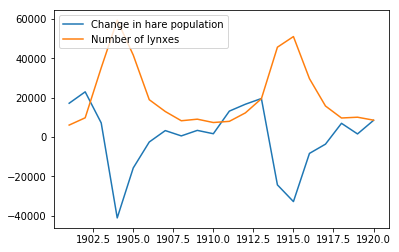

In [10]:
plt.plot(inf[:, 0][1:], inf[1:, 1] - inf[:20, 1], label = "Change in hare population")
plt.plot(inf[:, 0][1:], inf[1:, 2], label = "Number of lynxes")
plt.legend()
plt.show()

In [11]:
print(np.corrcoef(inf[1:,1] - inf[:20,1], inf[1:,2])[1,0])

-0.8494801603656876


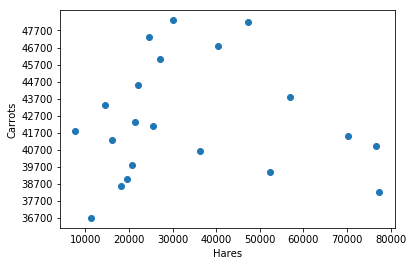

In [12]:
plt.scatter(inf[:, 1], inf[:, 3])
plt.yticks(np.arange(inf[:, 3].min(), inf[:, 3].max(), 1000))
plt.xlabel("Hares")
plt.ylabel("Carrots")
plt.show()

In [13]:
plt.scatter(inf[:, 2], inf[:, 3])
plt.yticks(np.arange(inf[:, 3].min(), inf[:, 3].max(), 1000))
plt.xlabel("Lynxes")
plt.ylabel("Carrots")
plt.show()

In [14]:
r = lm.LinearRegression()
r.fit(inf[:19, 2].reshape(-1, 1), inf[1:20, 1] - inf[:19, 1])
prediction = r.predict(inf[20, 2])[0] + inf[19, 1]
print(r.predict(inf[20, 2])[0] + inf[19, 1])
print(np.abs((r.predict(inf[20, 2])[0] + inf[19, 1]) / inf[20, 1] - 1))

24364.929407444484
0.013565611034636271
